In [1]:
%matplotlib inline

In [2]:
import h5py
import matplotlib.pyplot as plt
import tensorflow.contrib.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
import sklearn.preprocessing

keras.__file__

Using TensorFlow backend.


'/usr/local/lib/python3.5/dist-packages/tensorflow/contrib/keras/__init__.py'

In [3]:
with h5py.File('data/data.hdf5') as f:
    X_tr = f['X_tr'][...]
    y_tr = f['y_tr'][...]
    X_val = f['X_val'][...]
    y_val = f['y_val'][...]

N_CLASSES = 3
WIDTH = X_tr.shape[-1]
HEIGHT = 1
DEPTH = 1

In [4]:
import spectraldl.preprocessing

X_tr, y_tr = spectraldl.preprocessing.smote_over_sample(X_tr, y_tr, n_classes=3)

/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [5]:
X_tr, X_val = spectraldl.preprocessing.scale_samples(X_tr, X_val)

In [6]:
X_tr = X_tr.reshape(-1, HEIGHT, WIDTH, DEPTH)
X_val = X_val.reshape(-1, HEIGHT, WIDTH, DEPTH)

input_shape = X_tr.shape[1:]

y_oh_tr = keras.utils.to_categorical(y_tr, num_classes=N_CLASSES)
y_oh_val = keras.utils.to_categorical(y_val, num_classes=N_CLASSES)

model = Sequential()
model.add(Conv2D(32, (1, 10), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (1, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (1, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
    validation_data=(X_val, y_oh_val)
)

In [7]:
hist = model.fit(
    X_tr, y_oh_tr,
    epochs=50, batch_size=256, verbose=2,
    validation_data=(X_val, y_oh_val)
)

/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))
/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 13179 samples, validate on 2329 samples
Epoch 1/50
4s - loss: 0.3530 - acc: 0.8589 - val_loss: 0.2566 - val_acc: 0.9309
Epoch 2/50
2s - loss: 0.1916 - acc: 0.9269 - val_loss: 0.1995 - val_acc: 0.9489
Epoch 3/50
2s - loss: 0.1624 - acc: 0.9406 - val_loss: 0.1722 - val_acc: 0.9420
Epoch 4/50
2s - loss: 0.1449 - acc: 0.9451 - val_loss: 0.1591 - val_acc: 0.9566
Epoch 5/50
2s - loss: 0.1314 - acc: 0.9499 - val_loss: 0.1423 - val_acc: 0.9622
Epoch 6/50
2s - loss: 0.1237 - acc: 0.9530 - val_loss: 0.1077 - val_acc: 0.9669
Epoch 7/50
2s - loss: 0.1113 - acc: 0.9571 - val_loss: 0.1225 - val_acc: 0.9609
Epoch 8/50
2s - loss: 0.1112 - acc: 0.9579 - val_loss: 0.1018 - val_acc: 0.9674
Epoch 9/50
2s - loss: 0.1088 - acc: 0.9587 - val_loss: 0.0954 - val_acc: 0.9678
Epoch 10/50
2s - loss: 0.1034 - acc: 0.9594 - val_loss: 0.1003 - val_acc: 0.9652
Epoch 11/50
2s - loss: 0.0972 - acc: 0.9625 - val_loss: 0.1005 - val_acc: 0.9631
Epoch 12/50
2s - loss: 0.0940 - acc: 0.9651 - val_loss: 0.1015 - val_

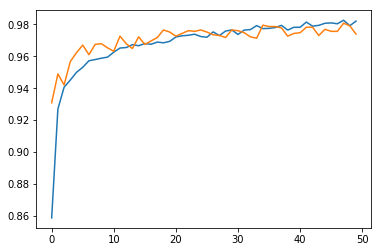

In [8]:
plt.plot(hist.epoch, hist.history['acc'])
plt.plot(hist.epoch, hist.history['val_acc'])

/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


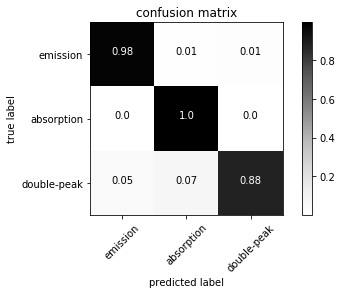

In [9]:
import spectraldl.plot
import sklearn.metrics

import importlib
importlib.reload(spectraldl.plot)

y_tmp = model.predict_classes(X_val, verbose=0)
cm = sklearn.metrics.confusion_matrix(y_pred=y_tmp, y_true=y_val)
classes=['emission', 'absorption', 'double-peak']
spectraldl.plot.plot_confusion_matrix(cm=cm, normalize=True, classes=classes)

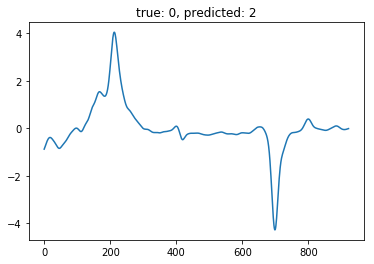

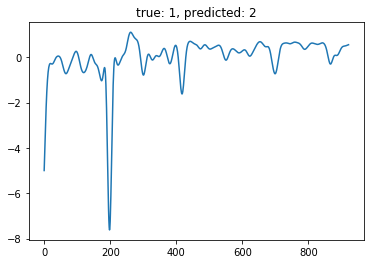

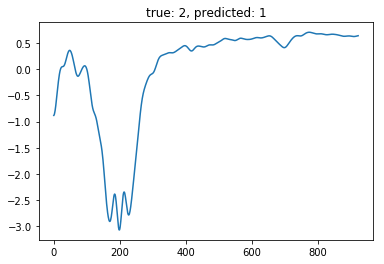

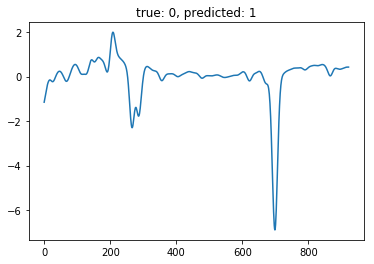

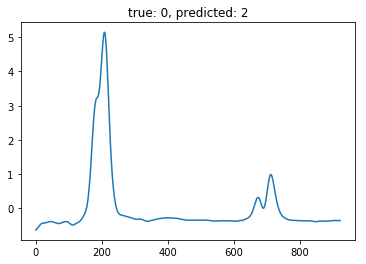

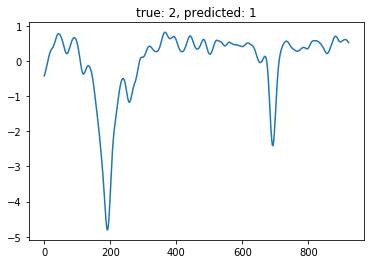

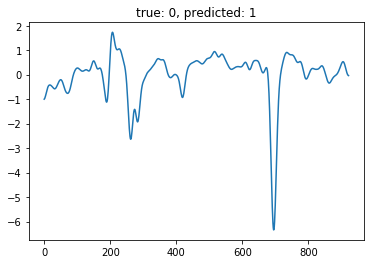

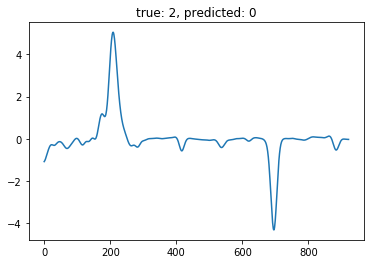

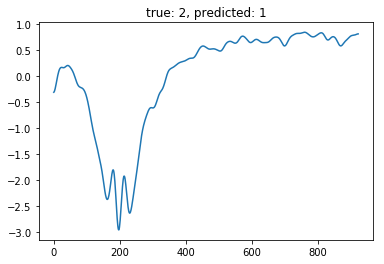

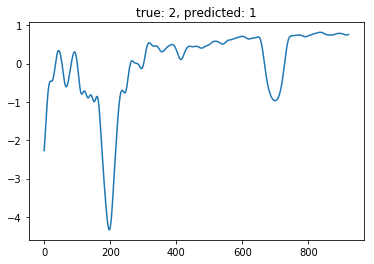

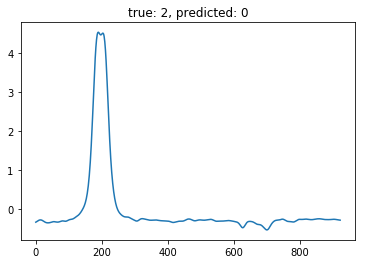

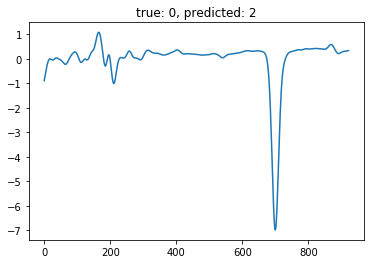

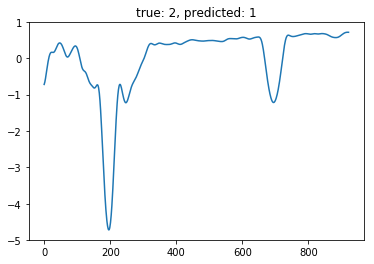

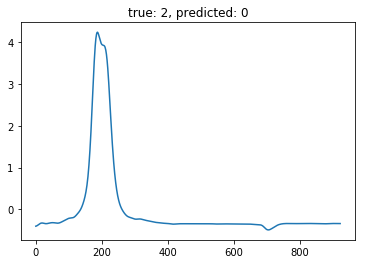

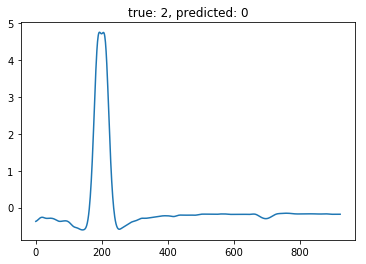

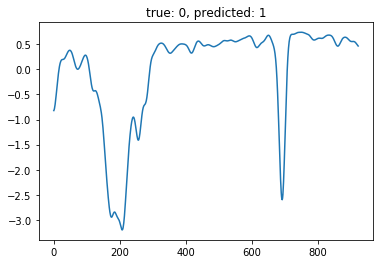

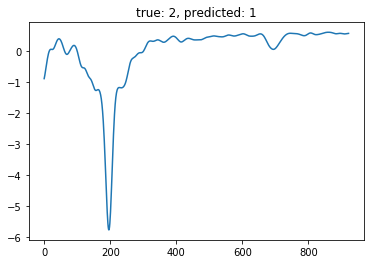

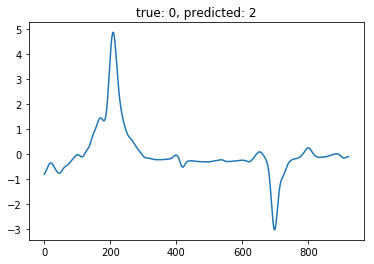

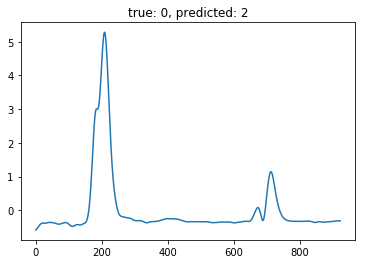

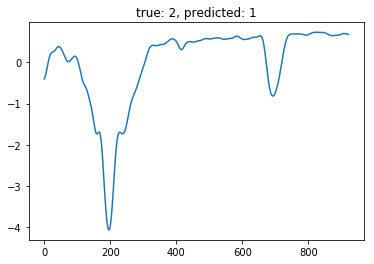

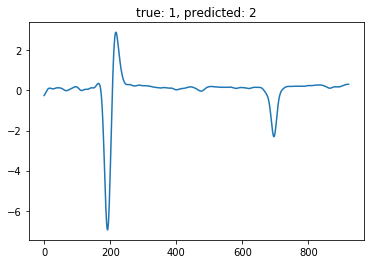

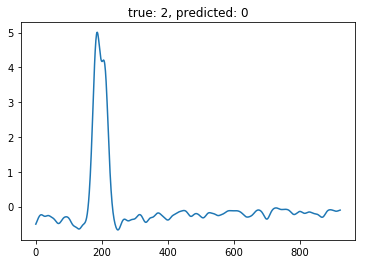

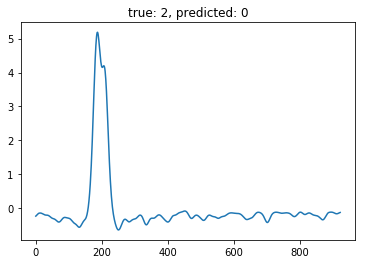

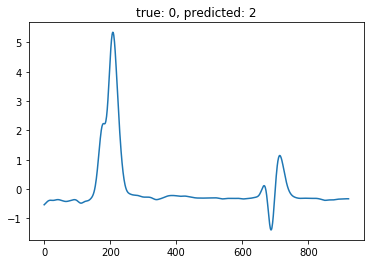

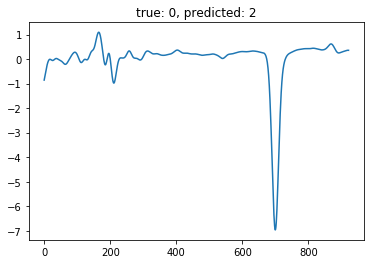

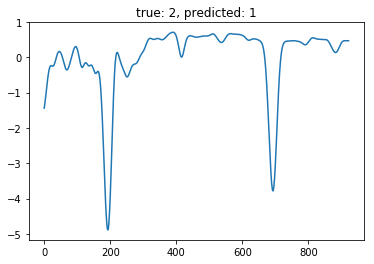

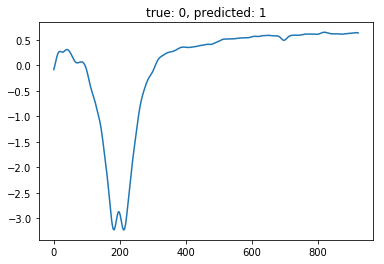

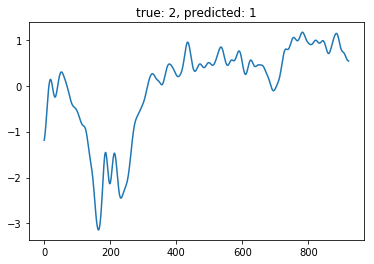

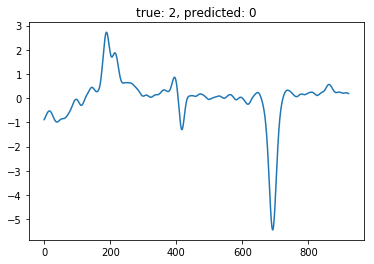

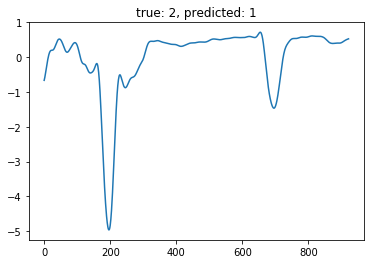

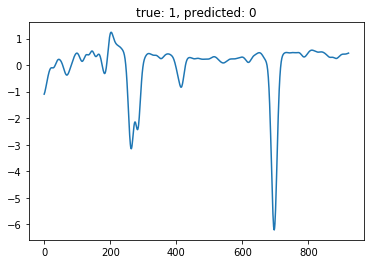

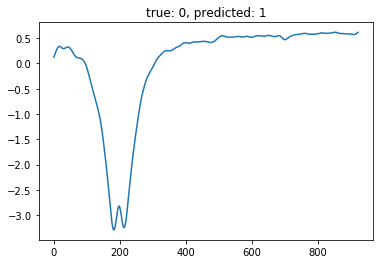

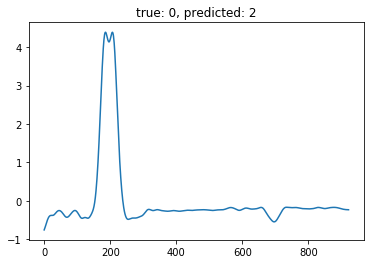

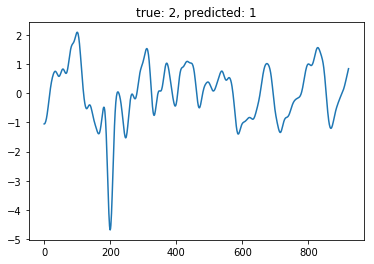

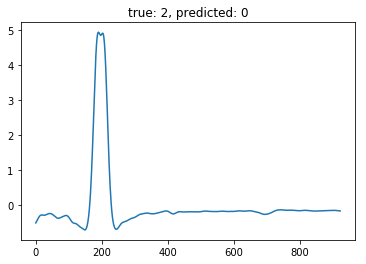

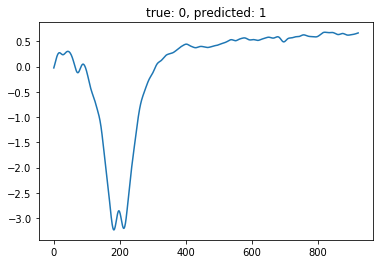

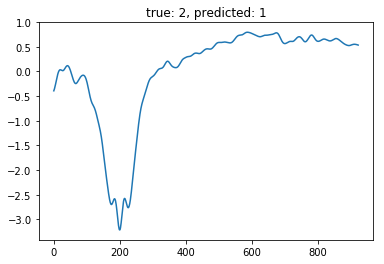

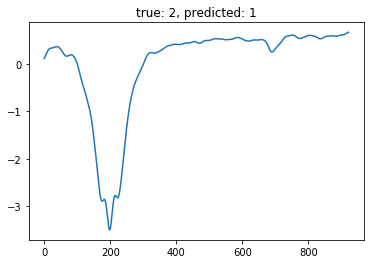

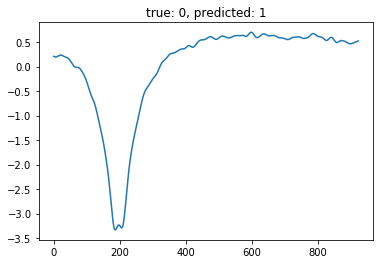

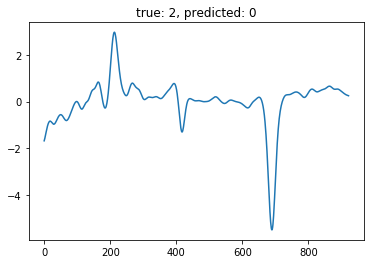

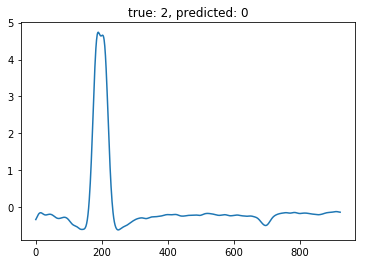

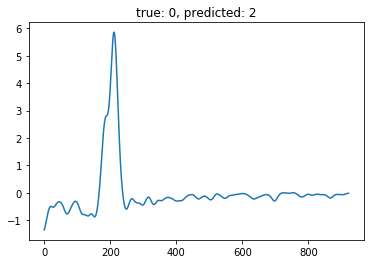

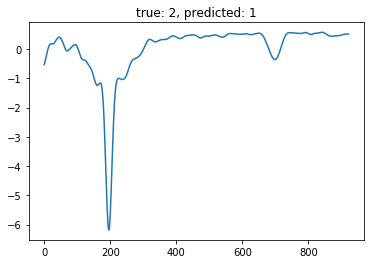

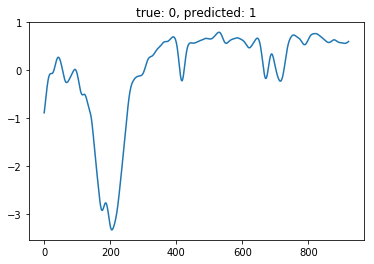

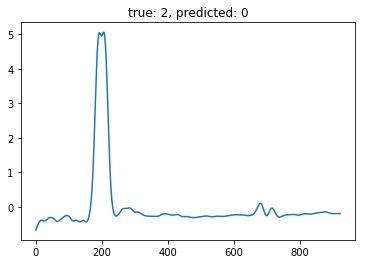

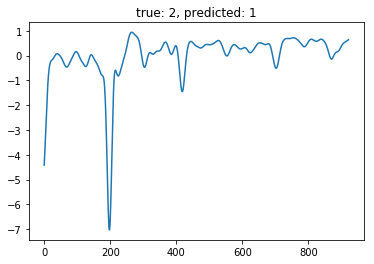

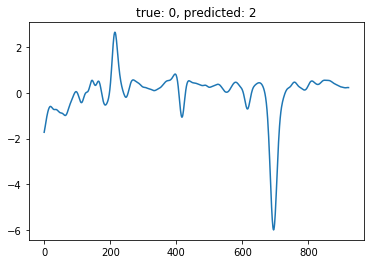

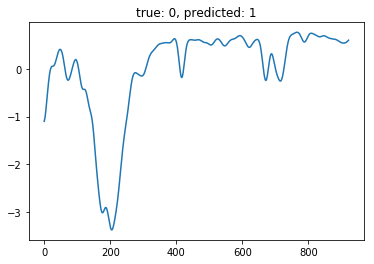

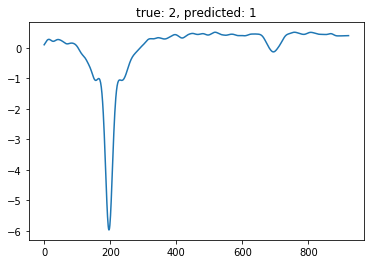

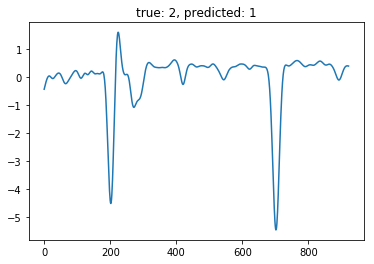

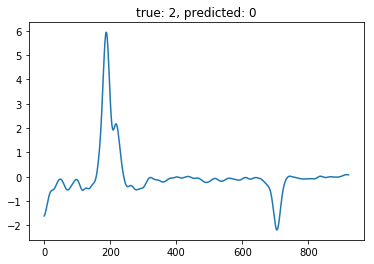

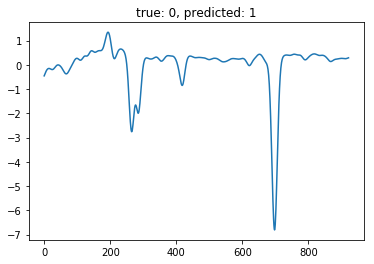

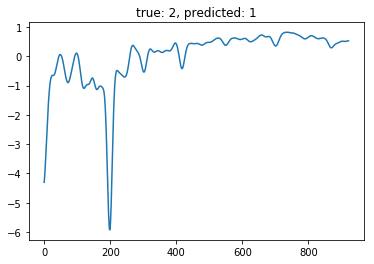

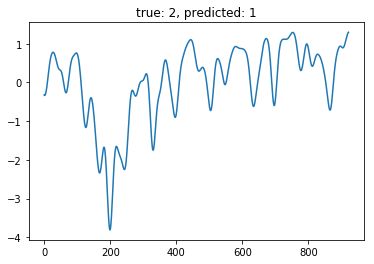

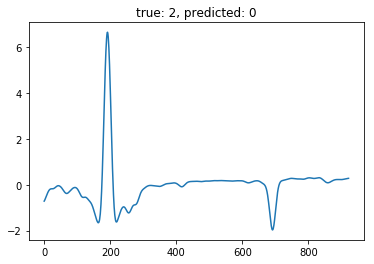

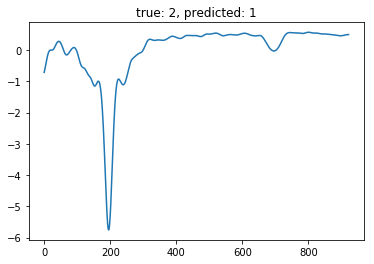

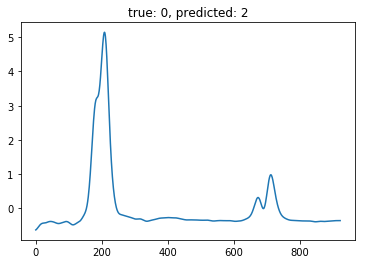

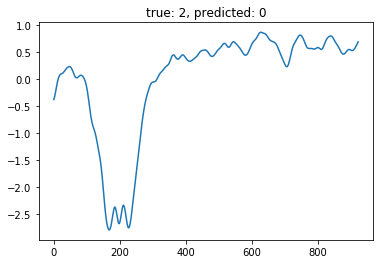

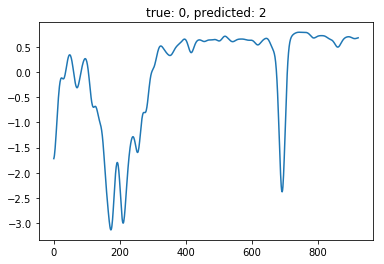

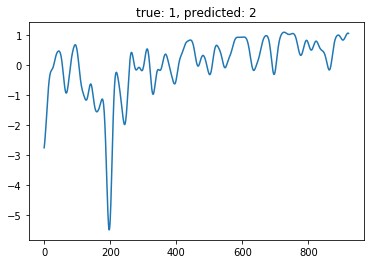

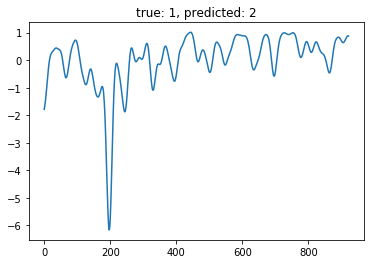

In [10]:
idx = y_tmp != y_val
for x, t, p in zip(X_val[idx], y_val[idx], y_tmp[idx]):
    plt.plot(x.reshape(-1))
    plt.title('true: ' + str(t) + ', predicted: ' + str(p))
    plt.show()